### BOOST INVARIANT

### Sampling from $p_T$-$\phi$ distribution of $\pi^+$

In [45]:
import os
currentdir=os.getcwd()
os.chdir(currentdir)

In [39]:
import numpy as np
global npt,ny,nphi,y1,max_pt,min_pt
from scipy.interpolate import UnivariateSpline
import random
from datetime import datetime
min_pt=0.01
max_pt=3.0
npt=16
nphi=40
ny=3
y1=-0.5
events=20
###for boost invarinat scenario#################################
df2 = np.loadtxt("spec_pion_phipt.dat")
################################################################

def giveprob(phi,pt,rap):
    x = df2[:,0]
    y = df2[:,1]
    z = df2[:,2]
    z=list(z)
    yi = np.unique(y)
    xi = np.unique(x)
    k=0
    spectra=[]
    max_val=0.0
    for i in range(len(xi)):
        m=[]
        for j in range (len(yi)):
            aa=z[k]
            m.append(np.log(aa))
            if np.log(aa) > max_val:
                max_val=np.log(aa)
            k=k+1
        spectra.append(m)   
    for i in range(len(xi)):
        spectra[i].append(spectra[i][0])
        
    pt_values=[min_pt+(max_pt-min_pt)*(float((i)**2)/float((npt-1)**2)) for i in range(npt)]
    pt_spacing=[pt_values[i+1]-pt_values[i] for i in range(npt-1)]
    pt_spacing.append(pt_spacing[14])

    def scaleToZeroToOne(value, value_at_zero,interval):
        return (value-value_at_zero)/interval    
    def linear_interp(x,  v0,  v1):
        return (1.0-x)*v0 + x*v1
    def bilinear_interp(x, y, v00, v01,v10, v11):
        return (1.0-x)*(1.0-y)*v00 + x*(1.0-y)*v10 + (1.0-x)*y*v01 + x*y*v11
    def trilinear_interp( x,  y,  z,  v000, v001,  v010,  v011, v100,  v101, v110, v111):
         return (1.0-x)*(1.0-y)*(1.0-z)*v000 + x*(1.0-y)*(1.0-z)*v100 +(1.0-x)*y*(1.0-z)*v010 + x*y*(1.0-z)*v110 + (1.0-x)*(1.0-y)*z*v001 +x*(1.0-y)*z*v101 + (1.0-x)*y*z*v011 + x*y*z*v111 
    def giveptindex(pt):
        return int(np.sqrt((pt-min_pt)/(max_pt-min_pt)*(npt-1)**2))
    def givephiindex(phi):
        dphi=2*np.pi/nphi
        return int(phi/dphi)
    def giveyindex(rap):
        dy=2.0*abs(y1)/ny
        return int((rap-y1)/dy)
    def giverapidity(i):
        dy=2.0*abs(y1)/ny
        return y1+i*dy
    def givept(i):
        return min_pt+(max_pt-min_pt)*(float((i)**2)/float((npt-1)**2))
    def givephi(i):
        dphi=2*np.pi/nphi
        return i*dphi
    
    y_index=giveyindex(rap)
    phi_index=givephiindex(phi)
    if phi_index==39:
        phi_index1=0
    else:
        phi_index1=phi_index+1
        
    pt_index=giveptindex(pt)
    #print(y_index,phi_index,pt_index)
    rap = scaleToZeroToOne(rap, giverapidity(y_index), 2*abs(y1)/(ny))
    phi = scaleToZeroToOne(phi, givephi(phi_index),2*np.pi/nphi)
    pt = scaleToZeroToOne(pt, givept(pt_index),pt_spacing[pt_index])
    ###for boost invarinat scenario#################################
    value = bilinear_interp(phi, pt,spectra[pt_index][phi_index],spectra[pt_index+1][phi_index],spectra[pt_index][phi_index1],spectra[pt_index+1][phi_index1])
    ###############################################################
    return np.exp(value-max_val)

def tot_pion():
    x = df2[:,0]
    y = df2[:,1]
    z = df2[:,2]
    nphi=40
    z=list(z)
    yi = np.unique(y)
    xi = np.unique(x)
    k=0
    p=[]
    for i in range(len(xi)):
        aa=0
        for j in range (len(yi)):
            aa=aa+z[k]*(2*np.pi/nphi) 
            k=k+1
        p.append(aa) 
    pt1=[0.1+(3-0.1)*(float((i)**2)/float((npt-1)**2)) for i in range(npt)] 
    x=[p[i]*pt1[i] for i in range(npt)]
    spl=UnivariateSpline(pt1, x)
    result1=spl.integral(0.1,3.0)
    return int(result1)

#print(giveprob(0.0,0.7,0.0))
print(tot_pion())
x11=[]
y11=[]
for kk in range(events):
    j=0
    print(kk)
    while j < tot_pion() :
        random.seed(datetime.now())
        z=random.random()
        flag=0
        while flag==0:
            PT = np.sqrt(random.random()*max_pt*max_pt)
            if PT < 0.1:
                flag = 0
            else:
                flag = 1
        PHI=random.random()*(2.0*np.pi)
        Y=0.0
        #print(PHI,PT,Y)
        prob=giveprob(PHI,PT,Y)
        if z < prob:
            x11.append(PT)
            y11.append(PHI)
            j=j+1

104
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.01  0.309 0.608 0.907 1.206 1.505 1.804 2.103 2.402 2.701 3.   ]
[0.1595 0.4585 0.7575 1.0565 1.3555 1.6545 1.9535 2.2525 2.5515 2.8505]


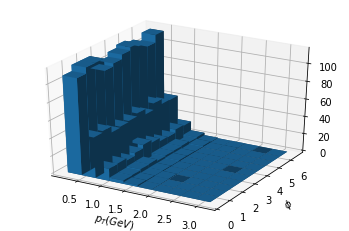

In [40]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import numpy as np
events=20
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x11, y11, bins=10, range=[[0.01,3.0 ], [0, 2*np.pi]])
print(xedges)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.5*(3.0-0.01)/10 , yedges[:-1] + 0.5*(2*np.pi-0.0)/10, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = (3.0-0.01)/10
dy = (2*np.pi-0.0)/10
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz/xpos/dx/dy/events, zsort='average')
ax.set_ylabel('$\phi$')
ax.set_xlabel(r'$p_T(GeV)$')
print(xedges[:-1] + 0.5*(3.0-0.01)/10)
#print(hist.ravel())
plt.savefig("pion_barplot.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


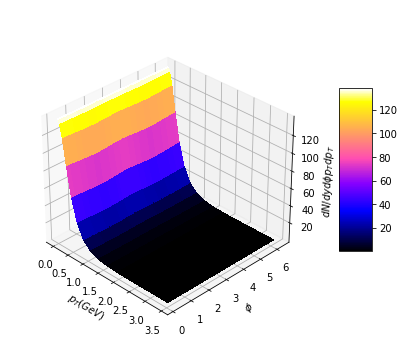

In [41]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
df2 = np.loadtxt("spec_pion_phipt.dat")
x = df2[:,0]
y = df2[:,1]
z = df2[:,2]
z=list(z)
yi = np.unique(y)
xi = np.unique(x)
k=0
p=[]
for i in range(len(xi)):
    m=[]
    for j in range (len(yi)):
        aa=z[k]
        m.append(aa)
        k=k+1
    p.append(m)   
xn, yn = np.meshgrid(xi, yi)
fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.0, 1.0, 0.8, 1]))
ax.set_ylabel('$\phi$')
ax.set_xlabel(r'$p_T(GeV)$')
ax.set_zlabel(r'$dN/dyd\phi p_T dp_T$',rotation=0)
ax.view_init(azim=-45)
surf=ax.plot_surface(xn, yn, np.transpose(np.array(p)), cmap=cm.gnuplot2, linewidth=0, antialiased=False) 
fig.colorbar(surf, shrink=0.5, aspect=5) 
plt.savefig("pion_spec_phipt.eps")

### Sampling from $p_T$-$\phi$ distribution of $K^+$


In [42]:
import numpy as np
import matplotlib.pyplot as plt
global npt,ny,nphi,y1,max_pt,min_pt
from scipy.interpolate import UnivariateSpline
import random
from datetime import datetime
min_pt=0.01
max_pt=3.0
npt=16
nphi=40
ny=3
y1=-0.5
events=300
df2 = np.loadtxt("spec_kaon_phipt.dat")
def giveprob(phi,pt,rap):
    x = df2[:,0]
    y = df2[:,1]
    z = df2[:,2]
    z=list(z)
    yi = np.unique(y)
    xi = np.unique(x)
    k=0
    spectra=[]
    max_val=0.0
    for i in range(len(xi)):
        m=[]
        for j in range (len(yi)):
            aa=z[k]
            m.append(np.log(aa))
            if np.log(aa) > max_val:
                max_val=np.log(aa)
            k=k+1
        spectra.append(m)   
    for i in range(len(xi)):
        spectra[i].append(spectra[i][0])
        
    pt_values=[min_pt+(max_pt-min_pt)*(float((i)**2)/float((npt-1)**2)) for i in range(npt)]
    pt_spacing=[pt_values[i+1]-pt_values[i] for i in range(npt-1)]
    pt_spacing.append(pt_spacing[14])


    def scaleToZeroToOne(value, value_at_zero,interval):
        return (value-value_at_zero)/interval    
    def linear_interp(x,  v0,  v1):
        return (1.0-x)*v0 + x*v1
    def bilinear_interp(x, y, v00, v01,v10, v11):
        return (1.0-x)*(1.0-y)*v00 + x*(1.0-y)*v10 + (1.0-x)*y*v01 + x*y*v11
    def trilinear_interp( x,  y,  z,  v000, v001,  v010,  v011, v100,  v101, v110, v111):
         return (1.0-x)*(1.0-y)*(1.0-z)*v000 + x*(1.0-y)*(1.0-z)*v100 +(1.0-x)*y*(1.0-z)*v010 + x*y*(1.0-z)*v110 + (1.0-x)*(1.0-y)*z*v001 +x*(1.0-y)*z*v101 + (1.0-x)*y*z*v011 + x*y*z*v111 
    def giveptindex(pt):
        return int(np.sqrt((pt-min_pt)/(max_pt-min_pt)*(npt-1)**2))
    def givephiindex(phi):
        dphi=2*np.pi/nphi
        return int(phi/dphi)
    def giveyindex(rap):
        dy=2.0*abs(y1)/ny
        return int((rap-y1)/dy)
    def giverapidity(i):
        dy=2.0*abs(y1)/ny
        return y1+i*dy
    def givept(i):
        return min_pt+(max_pt-min_pt)*(float((i)**2)/float((npt-1)**2))
    def givephi(i):
        dphi=2*np.pi/nphi
        return i*dphi
    
    y_index=giveyindex(rap)
    phi_index=givephiindex(phi)
    if phi_index==39:
        phi_index1=0
    else:
        phi_index1=phi_index+1
    pt_index=giveptindex(pt)
    #print(y_index,phi_index,pt_index)
    rap = scaleToZeroToOne(rap, giverapidity(y_index), 2*abs(y1)/(ny))
    phi = scaleToZeroToOne(phi, givephi(phi_index),2*np.pi/nphi)
    pt = scaleToZeroToOne(pt, givept(pt_index),pt_spacing[pt_index])
    ###for boost invarinat scenario#################################
    value = bilinear_interp(phi, pt,spectra[pt_index][phi_index],spectra[pt_index+1][phi_index],spectra[pt_index][phi_index1],spectra[pt_index+1][phi_index1])
    ###############################################################
    return np.exp(value-max_val)

def tot_kaon():
    x = df2[:,0]
    y = df2[:,1]
    z = df2[:,2]
    nphi=40
    z=list(z)
    yi = np.unique(y)
    xi = np.unique(x)
    k=0
    p=[]
    for i in range(len(xi)):
        aa=0
        for j in range (len(yi)):
            aa=aa+z[k]*(2*np.pi/nphi) 
            k=k+1
        p.append(aa) 
    pt1=[0.1+(3-0.1)*(float((i)**2)/float((npt-1)**2)) for i in range(npt)] 
    x=[p[i]*pt1[i] for i in range(npt)]
    spl=UnivariateSpline(pt1, x)
    result1=spl.integral(0.1,3.0)
    return int(result1)

#print(giveprob(0.0,0.7,0.0))
#print(tot_pion())
x11=[]
y11=[]
for kk in range(events):
    j=0
    #print(kk)
    while j < tot_kaon() :
        random.seed(datetime.now())
        z=random.random()
        flag=0
        while flag==0:
            PT = np.sqrt(random.random()*max_pt*max_pt)
            if PT < 0.1:
                flag = 0
            else:
                flag = 1
        PHI=random.random()*(2.0*np.pi)
        Y=0.0
        #print(PHI,PT,Y)
        prob=giveprob(PHI,PT,Y)
        if z < prob:
            x11.append(PT)
            y11.append(PHI)
            j=j+1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.01  0.309 0.608 0.907 1.206 1.505 1.804 2.103 2.402 2.701 3.   ]
[0.1595 0.4585 0.7575 1.0565 1.3555 1.6545 1.9535 2.2525 2.5515 2.8505]


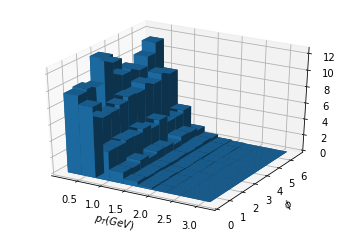

In [43]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np
events=300
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x11, y11, bins=10, range=[[0.01,3.0 ], [0, 2*np.pi]])
print(xedges)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.5*(3.0-0.01)/10 , yedges[:-1] + 0.5*(2*np.pi-0.0)/10, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = (3.0-0.01)/10
dy = (2*np.pi-0.0)/10
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz/xpos/dx/dy/events, zsort='average')
ax.set_ylabel('$\phi$')
ax.set_xlabel(r'$p_T(GeV)$')
plt.savefig("kaon_barplot.eps")
print(xedges[:-1] + 0.5*(3.0-0.01)/10)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


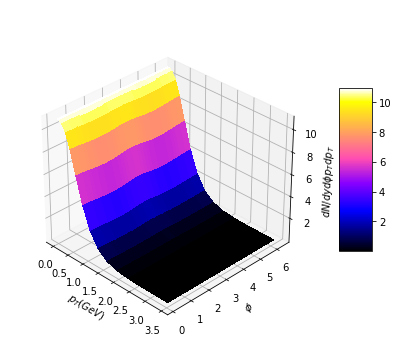

In [44]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import numpy as np
df2 = np.loadtxt("spec_kaon_phipt.dat")
x = df2[:,0]
y = df2[:,1]
z = df2[:,2]
z=list(z)
yi = np.unique(y)
xi = np.unique(x)
k=0
p=[]
for i in range(len(xi)):
    m=[]
    for j in range (len(yi)):
        aa=z[k]
        m.append(aa)
        k=k+1
    p.append(m)   
xn, yn = np.meshgrid(xi, yi)
fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.0, 1.0, 0.8, 1]))
ax.set_ylabel('$\phi$')
ax.set_xlabel(r'$p_T(GeV)$')
ax.set_zlabel(r'$dN/dyd\phi p_T dp_T$',rotation=0)
ax.view_init(azim=-45)
surf=ax.plot_surface(xn, yn, np.transpose(np.array(p)), cmap=cm.gnuplot2, linewidth=0, antialiased=False) 
fig.colorbar(surf, shrink=0.5, aspect=5) 
plt.savefig("kaon_spec_phipt.eps")

### Sampling from $p_T$-$\phi$ distribution of $p$

In [46]:
import numpy as np
import matplotlib.pyplot as plt
global npt,ny,nphi,y1,max_pt,min_pt
from scipy.interpolate import UnivariateSpline
import random
from datetime import datetime
min_pt=0.01
max_pt=3.0
npt=16
nphi=40
ny=3
y1=-0.5
events=1000
df2 = np.loadtxt("spec_proton_phipt.dat")
def giveprob(phi,pt,rap):
    x = df2[:,0]
    y = df2[:,1]
    z = df2[:,2]
    z=list(z)
    yi = np.unique(y)
    xi = np.unique(x)
    k=0
    spectra=[]
    max_val=0.0
    for i in range(len(xi)):
        m=[]
        for j in range (len(yi)):
            aa=z[k]
            m.append(np.log(aa))
            if np.log(aa) > max_val:
                max_val=np.log(aa)
            k=k+1
        spectra.append(m)   
    for i in range(len(xi)):
        spectra[i].append(spectra[i][0])
        
    pt_values=[min_pt+(max_pt-min_pt)*(float((i)**2)/float((npt-1)**2)) for i in range(npt)]
    pt_spacing=[pt_values[i+1]-pt_values[i] for i in range(npt-1)]
    pt_spacing.append(pt_spacing[14])


    def scaleToZeroToOne(value, value_at_zero,interval):
        return (value-value_at_zero)/interval    
    def linear_interp(x,  v0,  v1):
        return (1.0-x)*v0 + x*v1
    def bilinear_interp(x, y, v00, v01,v10, v11):
        return (1.0-x)*(1.0-y)*v00 + x*(1.0-y)*v10 + (1.0-x)*y*v01 + x*y*v11
    def trilinear_interp( x,  y,  z,  v000, v001,  v010,  v011, v100,  v101, v110, v111):
         return (1.0-x)*(1.0-y)*(1.0-z)*v000 + x*(1.0-y)*(1.0-z)*v100 +(1.0-x)*y*(1.0-z)*v010 + x*y*(1.0-z)*v110 + (1.0-x)*(1.0-y)*z*v001 +x*(1.0-y)*z*v101 + (1.0-x)*y*z*v011 + x*y*z*v111 
    def giveptindex(pt):
        return int(np.sqrt((pt-min_pt)/(max_pt-min_pt)*(npt-1)**2))
    def givephiindex(phi):
        dphi=2*np.pi/nphi
        return int(phi/dphi)
    def giveyindex(rap):
        dy=2.0*abs(y1)/ny
        return int((rap-y1)/dy)
    def giverapidity(i):
        dy=2.0*abs(y1)/ny
        return y1+i*dy
    def givept(i):
        return min_pt+(max_pt-min_pt)*(float((i)**2)/float((npt-1)**2))
    def givephi(i):
        dphi=2*np.pi/nphi
        return i*dphi
    
    y_index=giveyindex(rap)
    phi_index=givephiindex(phi)
    if phi_index==39:
        phi_index1=0
    else:
        phi_index1=phi_index+1
    pt_index=giveptindex(pt)
    #print(y_index,phi_index,pt_index)
    rap = scaleToZeroToOne(rap, giverapidity(y_index), 2*abs(y1)/(ny))
    phi = scaleToZeroToOne(phi, givephi(phi_index),2*np.pi/nphi)
    pt = scaleToZeroToOne(pt, givept(pt_index),pt_spacing[pt_index])
    ###for boost invarinat scenario#################################
    value = bilinear_interp(phi, pt,spectra[pt_index][phi_index],spectra[pt_index+1][phi_index],spectra[pt_index][phi_index1],spectra[pt_index+1][phi_index1])
    ###############################################################
    return np.exp(value-max_val)

def tot_proton():
    x = df2[:,0]
    y = df2[:,1]
    z = df2[:,2]
    nphi=40
    z=list(z)
    yi = np.unique(y)
    xi = np.unique(x)
    k=0
    p=[]
    for i in range(len(xi)):
        aa=0
        for j in range (len(yi)):
            aa=aa+z[k]*(2*np.pi/nphi) 
            k=k+1
        p.append(aa) 
    pt1=[0.1+(3-0.1)*(float((i)**2)/float((npt-1)**2)) for i in range(npt)] 
    x=[p[i]*pt1[i] for i in range(npt)]
    spl=UnivariateSpline(pt1, x)
    result1=spl.integral(0.1,3.0)
    return int(result1)

#print(giveprob(0.0,0.7,0.0))
#print(tot_pion())
x11=[]
y11=[]
for kk in range(events):
    j=0
    ##print(kk)
    while j < tot_proton() :
        random.seed(datetime.now())
        z=random.random()
        flag=0
        while flag==0:
            PT = np.sqrt(random.random()*max_pt*max_pt)
            if PT < 0.1:
                flag = 0
            else:
                flag = 1
        PHI=random.random()*(2.0*np.pi)
        Y=0.0
        #print(PHI,PT,Y)
        prob=giveprob(PHI,PT,Y)
        if z < prob:
            x11.append(PT)
            y11.append(PHI)
            j=j+1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.01  0.309 0.608 0.907 1.206 1.505 1.804 2.103 2.402 2.701 3.   ]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.1595 0.4585 0.7575 1.0565 1.3555 1.6545 1.9535 2.2525 2.5515 2.8505]


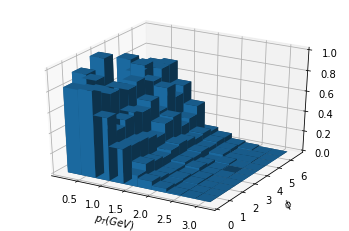

In [47]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import numpy as np
events=1000
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x11, y11, bins=10, range=[[0.01,3.0 ], [0, 2*np.pi]])
print(xedges)
xpos, ypos = np.meshgrid(xedges[:-1] + 0.5*(3.0-0.01)/10 , yedges[:-1] + 0.5*(2*np.pi-0.0)/10, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = (3.0-0.01)/10
dy = (2*np.pi-0.0)/10
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz/xpos/dx/dy/events, zsort='average')
ax.set_ylabel('$\phi$')
ax.set_xlabel(r'$p_T(GeV)$')
plt.savefig("proton_barplot.eps")
print(xedges[:-1] + 0.5*(3.0-0.01)/10)
#print(hist.ravel())

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


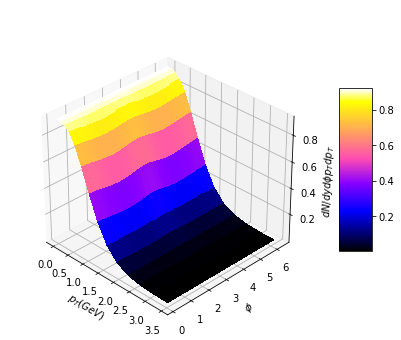

In [48]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import numpy as np
df2 = np.loadtxt("spec_proton_phipt.dat")
x = df2[:,0]
y = df2[:,1]
z = df2[:,2]
z=list(z)
yi = np.unique(y)
xi = np.unique(x)
k=0
p=[]
for i in range(len(xi)):
    m=[]
    for j in range (len(yi)):
        aa=z[k]
        m.append(aa)
        k=k+1
    p.append(m)   
xn, yn = np.meshgrid(xi, yi)
fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.0, 1.0, 0.8, 1]))
ax.set_ylabel('$\phi$')
ax.set_xlabel(r'$p_T(GeV)$')
ax.set_zlabel(r'$dN/dyd\phi p_T dp_T$',rotation=0)
ax.view_init(azim=-45)
surf=ax.plot_surface(xn, yn, np.transpose(np.array(p)), cmap=cm.gnuplot2, linewidth=0, antialiased=False) 
fig.colorbar(surf, shrink=0.5, aspect=5) 
plt.savefig("proton_spec_phipt.eps")